In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Project 0: Characterizing An Unknown Component Manually
-----------------------------------------------------------------------

Suppose you were given a new electronic component with two wires and you were asked
to measure its behavior. How would you do it? You might consider a circuit like this:

![Unknown](imgs/unknown.png)

You could monitor the current (I) with an ideal current meter, and set the voltage (V) with an ideal voltage supply.

Unfortunately you'd probably realize that we don't have any ideal current meters handy, (though we do have very nearly ideal voltage sources!). How could we measure the current accurately without putting a current meter inline with the component? After a bit of thought you might come up with this idea:

![Unknows_wR](imgs/unknown_wR.png)

How does that help? Note that if you *know* the resistance of the resistor, and you can *measure* the voltage at either end of that resistor, you can use Ohm's law to deduce the current flow! Easy! OK, so let's do it. You can go to [tinkercad](https://tinkercad.com) and create a circuit like this:

![Tinker](imgs/tinker.png)

Note that you can adjust the voltage knob on the power supply and the voltage shown change. Also, while this particular supply displays the current, you could compute the current using the voltage measurements and the resistance of the resistor (1000 $\Omega$). There is a video describing how to build this circuit on Tinkercad [here](https://youtu.be/UTcm4OGsDi4), and how to create it in LTSpice [here](https://youtu.be/9Oayt4ZMXoQ).

The current, in this case, is $I = (10.0\ {\rm V} - 5.71\ {\rm V})/1000\ \Omega \approx 4.29\ {\rm mA}$.

If you adjust the voltage over the range 0-10.0 V you can collect a set of data somethign like this. Note that you really should do the measurement!


In [3]:
LT_df = pd.read_csv('P0-LTSpice.txt', sep='\t')
print(LT_df.columns)
LT_df

Index(['v1', 'V(n001)', 'V(n002)'], dtype='object')


,v1,V(n001),V(n002)
0,0.0,0.0,0.0
1,1.0,1.0,0.5
2,2.0,2.0,1.0
3,3.0,3.0,1.5
4,4.0,4.0,2.0
5,5.0,5.0,2.5
6,6.0,6.0,3.0
7,7.0,7.0,3.5
8,8.0,8.0,4.0
9,9.0,9.0,4.5


In [10]:
v1 = LT_df['v1']
vn1 = LT_df['V(n001)']

Text(0, 0.5, 'V(n001) (V)')

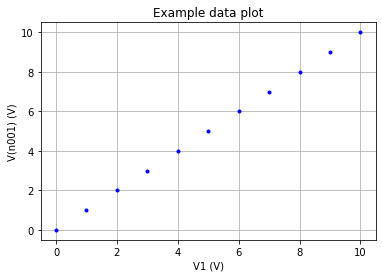

In [11]:
plt.plot(v1, vn1,'b.')
plt.grid()
plt.title("Example data plot")
plt.xlabel('V1 (V)')
plt.ylabel('V(n001) (V)')

In [12]:
m, b = np.polyfit(v1, vn1, 1)
m, b

(1.0, -1.0373548676729748e-16)

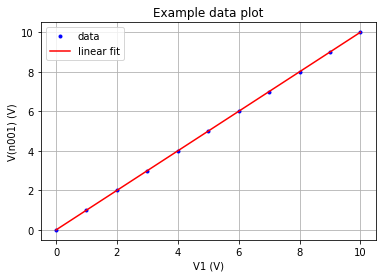

In [14]:
vn1th = m*v1 + b

plt.plot(v1, vn1,'b.', label='data')
plt.plot(v1, vn1th,'r-', label='linear fit')
plt.grid()
plt.title("Example data plot")
plt.xlabel('V1 (V)')
plt.ylabel('V(n001) (V)')
plt.legend()